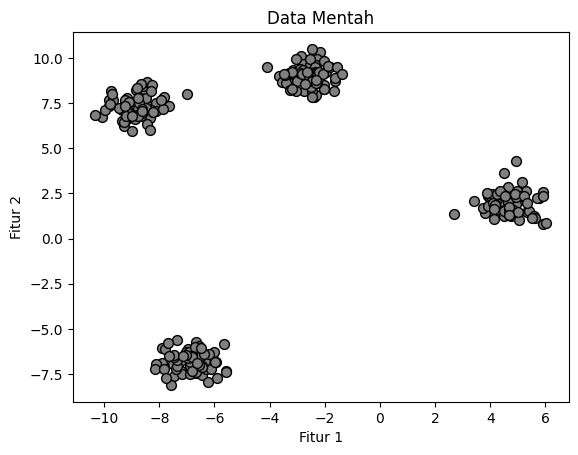

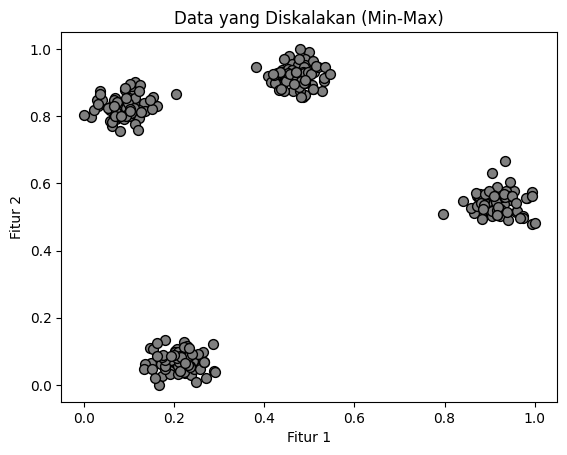

Rasio Varians yang Dijelaskan: [0.53660732 0.46339268]


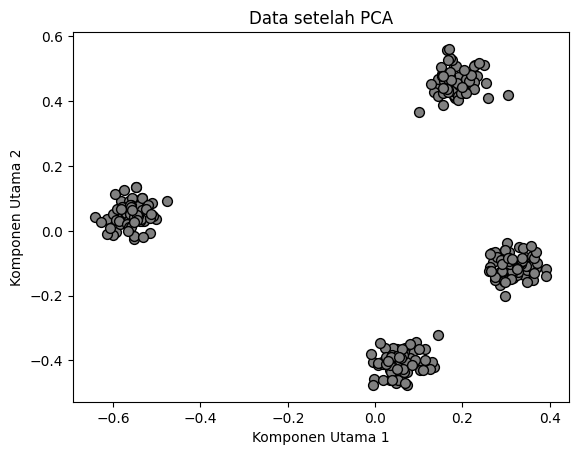

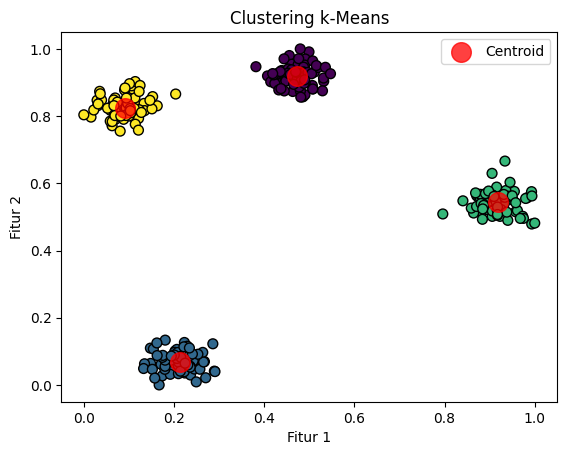

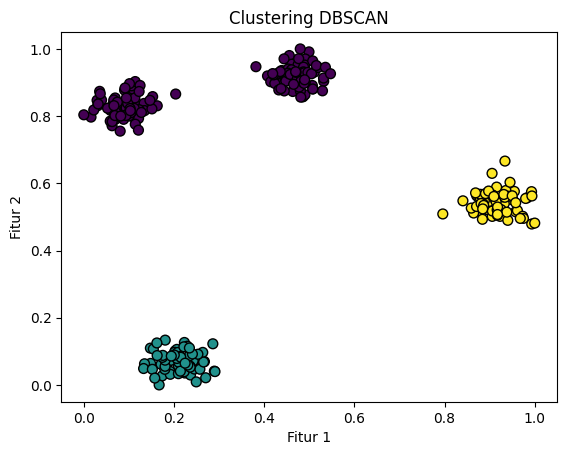


Kesimpulan:
1. Preprocessing menggunakan Min-Max Scaling memastikan semua fitur dinormalisasi, sehingga meningkatkan performa clustering.
2. PCA mengurangi dimensi data sambil mempertahankan sebagian besar varians, mempermudah visualisasi dan analisis.
3. k-Means efektif mengelompokkan data ke dalam cluster, tetapi mengasumsikan cluster berbentuk bulat dan membutuhkan jumlah cluster yang ditentukan.
4. DBSCAN dapat mendeteksi cluster dengan bentuk arbitrer dan outlier, tetapi performanya bergantung pada pemilihan parameter (eps dan min_samples).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs

# 1. Persiapan Data
# Membuat data sintetis untuk clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualisasi data mentah
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', edgecolor='k')
plt.title("Data Mentah")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

# Penjelasan:
# Data sintetis terdiri dari 300 sampel dengan 4 pusat cluster. Data ini digunakan untuk demonstrasi metode clustering.

# 2. Preprocessing dan Scaling
# Menggunakan Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Visualisasi data yang sudah diskalakan
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c='gray', edgecolor='k')
plt.title("Data yang Diskalakan (Min-Max)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

# Penjelasan:
# Min-Max Scaling memastikan semua fitur berada dalam rentang yang sama, yaitu antara 0 dan 1, untuk menghindari dominasi fitur tertentu.

# 3. Reduksi Dimensi menggunakan PCA
# Mengaplikasikan PCA untuk mereduksi data menjadi 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Rasio Varians yang Dijelaskan:", pca.explained_variance_ratio_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, c='gray', edgecolor='k')
plt.title("Data setelah PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()

# Penjelasan:
# PCA digunakan untuk mengurangi dimensi data dengan mempertahankan sebagian besar informasi varians, sehingga mempermudah visualisasi.

# 4. Clustering
# Mengaplikasikan k-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# Visualisasi hasil k-Means Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Centroid')
plt.title("Clustering k-Means")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend()
plt.show()

# Penjelasan:
# k-Means mengelompokkan data ke dalam 4 cluster dengan menghitung jarak ke centroid terdekat. Centroid ditampilkan dalam warna merah.

# Mengaplikasikan DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualisasi hasil DBSCAN Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=50, edgecolor='k')
plt.title("Clustering DBSCAN")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

# Penjelasan:
# DBSCAN mengidentifikasi cluster berdasarkan kerapatan lokal data. Parameter eps menentukan radius pencarian dan min_samples jumlah minimum sampel untuk membentuk cluster.

# Kesimpulan
print("\nKesimpulan:")
print("1. Preprocessing menggunakan Min-Max Scaling memastikan semua fitur dinormalisasi, sehingga meningkatkan performa clustering.")
print("2. PCA mengurangi dimensi data sambil mempertahankan sebagian besar varians, mempermudah visualisasi dan analisis.")
print("3. k-Means efektif mengelompokkan data ke dalam cluster, tetapi mengasumsikan cluster berbentuk bulat dan membutuhkan jumlah cluster yang ditentukan.")
print("4. DBSCAN dapat mendeteksi cluster dengan bentuk arbitrer dan outlier, tetapi performanya bergantung pada pemilihan parameter (eps dan min_samples).")
